## Embedding 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simple 2D example of embedding vectors
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

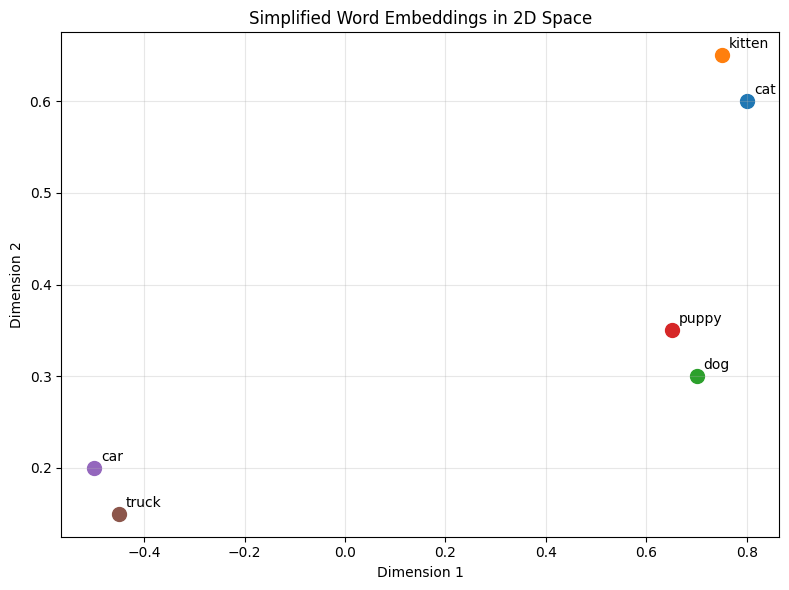

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):

    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    return dot_product / (norm_vec1 * norm_vec2)

In [5]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

In [6]:
cat_kitten_sim = cosine_similarity(cat_vector, kitten_vector)
print(cat_kitten_sim)

0.9966186334192181


In [7]:
cosine_similarity(cat_vector, car_vector)

np.float64(-0.43718588548916804)

## HuggingFace Embedding

In [8]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

/Users/beniaminenahid/Documents/Github_Repo/Retrieval_Augmented_Generation_RAG/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [9]:
# generate first embedding
text = "I love programming in Python."

embedding = embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Length of embedding vector: {len(embedding)}")
print(embedding)


Text: I love programming in Python.
Length of embedding vector: 384
[-0.05761704593896866, 0.004262273199856281, -0.028153125196695328, 0.02519758604466915, -0.01650560460984707, -0.1773674339056015, 0.008361932821571827, 0.07995728403329849, -0.0127755431458354, 0.030968770384788513, -0.06119596213102341, 0.04324905201792717, 0.057725392282009125, 0.03860897570848465, 0.06398425996303558, -0.03220921754837036, -0.09853547066450119, -0.011203547939658165, 0.03873400017619133, -0.13676868379116058, -0.09101399779319763, 0.0386880561709404, -0.0030839170794934034, -0.0019542367663234472, 0.03219810873270035, -0.012075014412403107, 0.010174613445997238, -0.02687622793018818, -0.01969327963888645, -0.05766361206769943, -0.08681893348693848, 0.12009260803461075, 0.03700999170541763, 0.03542623668909073, 0.005967879667878151, 0.05939224734902382, 0.04013896360993385, -0.06003228947520256, -0.01643536239862442, 0.0328885093331337, -0.04534770920872688, 0.05807153135538101, -0.0012867153855040

In [10]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018348455429, -0.011870156042277813, -0.028116997331380844, 0.051238544285297394, -0.055974505841732025, 0.03019152767956257, 0.030161302536725998, 0.024698294699192047, -0.01837053894996643, 0.05876684561371803, -0.024953141808509827, 0.06015419960021973, 0.03983170911669731, 0.033230509608983994, -0.06131141632795334, -0.04937310889363289, -0.05486347898840904, -0.04007610306143761, 0.05642913281917572, 0.039156604558229446, -0.03473712131381035, -0.013247719034552574, 0.03196623548865318, -0.06349916756153107, -0.06017857789993286, 0.07823452353477478, -0.028303835541009903, -0.047442808747291565, 0.040359318256378174, -0.0066309357061982155, -0.0667409673333168, -0.004191323649138212, -0.02531169168651104, 0.05334161967039108, 0.017428051680326462, -0.0979236364364624, 0.006061263382434845, -0.06524164229631424, 0.045572586357593536, 0.023641834035515785, 0.07658474892377853, -0.010264388285577297, -0.004076812416315079, -0.062322795391082764, 0.03370519354939461, 0.01866113

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications



## OpenAI Embeddings

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()


True

In [2]:
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [3]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings( model="text-embedding-3-small" )
embeddings

OpenAIEmbeddings(client=<openai.resources.embeddings.Embeddings object at 0x1280ab230>, async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x1287d9160>, model='text-embedding-3-small', dimensions=None, deployment='text-embedding-ada-002', openai_api_version=None, openai_api_base=None, openai_api_type=None, openai_proxy=None, embedding_ctx_length=8191, openai_api_key=SecretStr('**********'), openai_organization=None, allowed_special=None, disallowed_special=None, chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None, http_async_client=None, check_embedding_ctx_length=True)

In [4]:
## Single text embeddings
single_text="Langchain and Rag are amazing frameworks and projects to work on"
single_embeddings=embeddings.embed_query(single_text)
print(len(single_embeddings))
print(single_embeddings)

1536
[-0.050117287784814835, -0.031115729361772537, -0.003491331823170185, -0.0032497290521860123, 0.03247687220573425, -0.03166018798947334, -0.01475479081273079, 0.0014683330664411187, -0.011045675724744797, -0.03416468948125839, 0.018075980246067047, 0.0051042865961790085, -0.03849312663078308, 0.050062842667102814, 0.005812080577015877, 0.014468950219452381, -0.000220760382944718, -0.062394797801971436, 0.040616508573293686, 0.06522597372531891, -0.0015304351691156626, -0.006271466612815857, -0.018007922917604446, 0.03296688571572304, -0.006969052366912365, -0.008085189387202263, -0.007622401230037212, 0.06315703690052032, 0.017599578946828842, -0.019763797521591187, 0.0002467071753926575, -0.03394690901041031, -0.006809118203818798, 0.03370190039277077, 0.01519035641103983, 0.022077741101384163, -0.0058018723502755165, 0.0038009919226169586, -0.008010326884686947, 0.02263580821454525, 0.009425915777683258, 0.03767643868923187, 0.004345449153333902, -0.007588372565805912, 0.0177493

In [10]:
print("Single Text Embedding:")
print(f"Input: {single_text}")
print(f"Output: Vector of {len(single_embeddings)} dimensions")
print(f"Sample values: {single_embeddings[:5]}")

Single Text Embedding:
Input: Langchain and Rag are amazing frameworks and projects to work on
Output: Vector of 1536 dimensions
Sample values: [-0.050117287784814835, -0.031115729361772537, -0.003491331823170185, -0.0032497290521860123, 0.03247687220573425]


In [6]:
# Example 2: Multiple texts at once
multiple_texts = [
    "Python is a programming language",
    "LangChain is a framework for LLM applications",
    "Embeddings convert text to numbers",
    "Vectors can be compared for similarity"
]

In [7]:
multiple_embeddings = embeddings.embed_documents(multiple_texts)

In [8]:
multiple_embeddings

[[-0.011004673317074776,
  -0.020408110693097115,
  0.018817074596881866,
  -0.0028302103746682405,
  0.015716591849923134,
  -0.026639673858880997,
  0.0005226965295150876,
  0.03720579296350479,
  -0.0017197990091517568,
  0.012993469834327698,
  0.021540194749832153,
  -0.0247222688049078,
  -0.009428935125470161,
  0.0018638592446222901,
  0.003916399087756872,
  0.015502413734793663,
  -0.03296302631497383,
  0.029780952259898186,
  -0.027210814878344536,
  0.010372338816523552,
  -0.001478848629631102,
  -0.009913384914398193,
  -0.05385048687458038,
  0.01543102040886879,
  0.03685902804136276,
  -0.04291720688343048,
  0.005415645893663168,
  0.03622669354081154,
  -0.01945960894227028,
  0.0011199729051440954,
  0.01297307200729847,
  -0.032351087778806686,
  -0.03653265908360481,
  0.05123955383896828,
  -0.03118840791285038,
  -0.04507938772439957,
  0.04585450515151024,
  -0.010464129038155079,
  0.06837379932403564,
  -0.015074057504534721,
  0.004041336476802826,
  -0.039

In [9]:
print("\nMultiple Text Embeddings:")
print(f"Number of texts: {len(multiple_texts)}")
print(f"Number of embeddings: {len(multiple_embeddings)}")
print(f"Each embedding size: {len(multiple_embeddings[0])}")


Multiple Text Embeddings:
Number of texts: 4
Number of embeddings: 4
Each embedding size: 1536


In [11]:

from langchain_openai import OpenAIEmbeddings

# Different OpenAI embedding models
models_comparison = {
    "text-embedding-3-small": {
        "dimensions": 1536,
        "description": "Good balance of performance and cost",
        "cost_per_1m_tokens": 0.02,
        "use_case": "General purpose, cost-effective"
    },
    "text-embedding-3-large": {
        "dimensions": 3072,
        "description": "Highest quality embeddings",
        "cost_per_1m_tokens": 0.13,
        "use_case": "When accuracy is critical"
    },
    "text-embedding-ada-002": {
        "dimensions": 1536,
        "description": "Previous generation model",
        "cost_per_1m_tokens": 0.10,
        "use_case": "Legacy applications"
    }
}

# Display comparison
print("📊 OpenAI Embedding Models Comparison:\n")
for model_name, details in models_comparison.items():
    print(f"Model: {model_name}")
    print(f"  📏 Dimensions: {details['dimensions']}")
    print(f"  💰 Cost: ${details['cost_per_1m_tokens']}/1M tokens")
    print(f"  📝 Description: {details['description']}")
    print(f"  🎯 Use case: {details['use_case']}\n")

📊 OpenAI Embedding Models Comparison:

Model: text-embedding-3-small
  📏 Dimensions: 1536
  💰 Cost: $0.02/1M tokens
  📝 Description: Good balance of performance and cost
  🎯 Use case: General purpose, cost-effective

Model: text-embedding-3-large
  📏 Dimensions: 3072
  💰 Cost: $0.13/1M tokens
  📝 Description: Highest quality embeddings
  🎯 Use case: When accuracy is critical

Model: text-embedding-ada-002
  📏 Dimensions: 1536
  💰 Cost: $0.1/1M tokens
  📝 Description: Previous generation model
  🎯 Use case: Legacy applications



## Cosine Similarity with OpenAI Embeddings

In [12]:
# Example 1: Finding similar sentences
sentences = [
    "The cat sat on the mat",
    "A feline rested on the rug",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

In [13]:
import numpy as np
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)

In [14]:
sentence_embeddings=embeddings.embed_documents(sentences)
sentence_embeddings

[[-0.030743632465600967,
  -0.04954146221280098,
  -0.005025898572057486,
  -0.0014964572619646788,
  0.03622525557875633,
  -0.002058840822428465,
  -0.008927030488848686,
  0.02720126137137413,
  0.007078275084495544,
  -0.011868230998516083,
  0.041629306972026825,
  -0.001393030397593975,
  0.04514582082629204,
  0.05279940739274025,
  0.03206232562661171,
  0.032501887530088425,
  -0.012437079101800919,
  0.003083413001149893,
  -0.06593462079763412,
  0.04747292399406433,
  0.0258437842130661,
  -0.04540438950061798,
  -0.0034615674521774054,
  0.014596114866435528,
  0.009082170203328133,
  0.014790039509534836,
  -0.011170100420713425,
  -0.012042764574289322,
  0.01075639296323061,
  0.012837857939302921,
  0.01229486707597971,
  -0.036070115864276886,
  -0.026503130793571472,
  -0.04535267502069473,
  -0.0345962829887867,
  0.004793188069015741,
  -0.019896740093827248,
  -0.011745411902666092,
  -0.04206887260079384,
  -0.022857334464788437,
  -0.036354538053274155,
  -0.005

In [15]:
## Calculate the simialrity betwween all pairs

for i in range(len(sentences)):
    for j in range(i+1,len(sentences)):
        similarity=cosine_similarity(sentence_embeddings[i],sentence_embeddings[j])

        print(f"'{sentences[i]}' vs '{sentences[j]}'")
        print(f"Similarity: {similarity:.3f}\n")

'The cat sat on the mat' vs 'A feline rested on the rug'
Similarity: 0.656

'The cat sat on the mat' vs 'The dog played in the yard'
Similarity: 0.324

'The cat sat on the mat' vs 'I love programming in Python'
Similarity: 0.090

'The cat sat on the mat' vs 'Python is my favorite programming language'
Similarity: 0.120

'A feline rested on the rug' vs 'The dog played in the yard'
Similarity: 0.296

'A feline rested on the rug' vs 'I love programming in Python'
Similarity: 0.055

'A feline rested on the rug' vs 'Python is my favorite programming language'
Similarity: 0.103

'The dog played in the yard' vs 'I love programming in Python'
Similarity: 0.126

'The dog played in the yard' vs 'Python is my favorite programming language'
Similarity: 0.085

'I love programming in Python' vs 'Python is my favorite programming language'
Similarity: 0.708



In [16]:
### Example- Semantic Search- Retireve the similar sentence
# Test semantic search
documents = [
    "LangChain is a framework for developing applications powered by language models",
    "Python is a high-level programming language",
    "Machine learning is a subset of artificial intelligence",
    "Embeddings convert text into numerical vectors",
    "The weather today is sunny and warm"
]
query="What is Langchain?"

In [17]:
def semantic_search(query,documents,embeddings_models,top_k=3):
    """Simple semantic search implementation"""

    ## embed query and doument

    query_embedding=embeddings_models.embed_query(query)
    doc_embeddings = embeddings_models.embed_documents(documents)

    ## Calculate the similarity score

    similarties=[]

    for i,doc_emb in enumerate(doc_embeddings):
        similarity=cosine_similarity(query_embedding,doc_emb)
        similarties.append((similarity,documents[i]))

    ## Sort by similarity
    similarties.sort(reverse=True)
    return similarties[:top_k]


In [18]:
results=semantic_search(query,documents,embeddings)
results

[(np.float64(0.6756871264409868),
  'LangChain is a framework for developing applications powered by language models'),
 (np.float64(0.1301932439856704),
  'Python is a high-level programming language'),
 (np.float64(0.10106358201980063),
  'Embeddings convert text into numerical vectors')]

In [20]:
print(f"\nSemantic Search Results for: '{query}'")
for score, doc in results:
    print(f"Score: {score:.3f} | {doc}")


Semantic Search Results for: 'What is Langchain?'
Score: 0.676 | LangChain is a framework for developing applications powered by language models
Score: 0.130 | Python is a high-level programming language
Score: 0.101 | Embeddings convert text into numerical vectors


In [21]:
query="What is Embeddings?"
results=semantic_search(query,documents,embeddings)
results

[(np.float64(0.6229132356090962),
  'Embeddings convert text into numerical vectors'),
 (np.float64(0.2520501338547312),
  'Machine learning is a subset of artificial intelligence'),
 (np.float64(0.2290817772841199),
  'LangChain is a framework for developing applications powered by language models')]